In [118]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path 
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import torch
import torch.nn as nn
from PIL import Image
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# EDA

In [119]:
import random
CFG = {
    'EPOCHS':100, 
    'BATCH_SIZE':16,
    'SEED':1,
}

In [120]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(CFG['SEED']) #시드고정 함수 선언후 시드고정

In [121]:
import glob
train_path=sorted(glob.glob("../input/ererer/All-Age-Faces Dataset/original images/*.jpg"))

In [122]:
print(len(train_path))

13322


In [123]:
from torchvision import transforms

train_transform = transforms.Compose([
                    transforms.ToPILImage(),
                    transforms.Resize((128, 128)),
                    transforms.ToTensor(),
                    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                    ])

test_transform = transforms.Compose([
                    transforms.ToPILImage(),
                    transforms.Resize((128, 128)),
                    transforms.ToTensor(),
                    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                    ])
horizontal_transform= transforms.Compose([
                    transforms.ToPILImage(),
                    transforms.Resize((128, 128)),
                    transforms.RandomHorizontalFlip(1.0),
                    transforms.ToTensor(),
                    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                    ])
zoom_transform= transforms.Compose([
                    transforms.ToPILImage(),
                    transforms.Resize((128, 128)),
                    transforms.RandomResizedCrop(size=(128, 128), scale=(0.5, 1.5)),
                    transforms.ToTensor(),
                    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                    ])
crop_transform= transforms.Compose([
                    transforms.ToPILImage(),
                    transforms.Resize((128, 128)),
                    transforms.RandomAffine(degrees=20, translate=(0.2, 0.2)),
                    transforms.ToTensor(),
                    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                    ])

In [124]:
train_path[0]

'../input/ererer/All-Age-Faces Dataset/original images/00000A02.jpg'

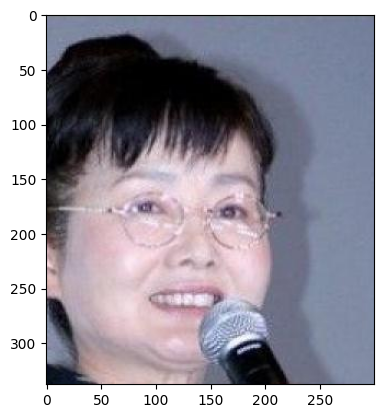

In [125]:
img=cv2.imread('../input/ererer/All-Age-Faces Dataset/original images/06961A64.jpg') #85번째 경로의 이미지 불러오기
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #pyplot에서 보기위해서 BGR을 RGB로 변환
plt.imshow(img)
plt.show()

흑백사진을 판별하기위한 알고리즘

In [126]:
remomve_list=[]   
for i in range(len(train_path)):
  img=cv2.imread(train_path[i])
  if (img[0][0][0]==img[0][0][1]==img[0][0][2] and img[5][5][0]==img[5][5][1]==img[5][5][2] and img[15][15][0]==img[15][15][1]==img[15][15][2] and img[35][35][0]==img[35][35][1]==img[35][35][2]): #특정 픽셀값들의 RGB값이 같을시 흑백사진이라고 판단
    remomve_list.append(i) #흑백사진의 인덱스를 리스트에 추가

print(len(remomve_list))

1252


In [127]:
remove_idx=[2, 6, 22, 85, 86, 105, 112, 128, 135, 141, 155, 156, 161, 183, 192, 197, 209, 219, 245, 246, 281, 290, 292, 293, 295, 298, 302, 303, 313, 326, 328, 329, 331, 367, 372, 375, 379, 385, 386, 394, 408, 412, 426, 430, 436, 437, 438, 443, 455, 457, 460, 461, 470, 481, 482, 483, 512, 517, 523, 536, 538, 558, 563, 579, 585, 596, 631, 632, 633, 638, 639, 640, 646, 649, 665, 666, 668, 703, 708, 720, 729, 746, 769, 776, 778, 782, 788, 790, 805, 808, 813, 814, 816, 833, 842, 855, 858, 880, 882, 915, 916, 919, 962, 966, 968, 972, 974, 988, 990, 999, 1006, 1022, 1027, 1040, 1088, 1119, 1120, 1133, 1141, 1159, 1171, 1189, 1195, 1210, 1212, 1215, 1234, 1240, 1262, 1280, 1288, 1300, 1308, 1329, 1332, 1357, 1374, 1375, 1380, 1386, 1472, 1508, 1534, 1540, 1570, 1588, 1593, 1602, 1609, 1614, 1625, 1659, 1665, 1676, 1692, 1722, 1730, 1739, 1757, 1778, 1781, 1785, 1829, 1834, 1840, 1854, 1857, 1876, 1884, 1889, 1894, 1896, 1915, 1957, 1984, 2015, 2030, 2042, 2047, 2048, 2077, 2083, 2105, 2111, 2114, 2118, 2138, 2156, 2231, 2236, 2256, 2274, 2292, 2351, 2403, 2407, 2416, 2420, 2427, 2443, 2447, 2462, 2503, 2510, 2544, 2552, 2557, 2576, 2579, 2594, 2597, 2604, 2607, 2637, 2643, 2658, 2738, 2744, 2758, 2791, 2799, 2835, 2854, 2870, 2961, 2977, 3028, 3048, 3087, 3100, 3129, 3131, 3136, 3137, 3143, 3144, 3150, 3162, 3198, 3210, 3224, 3236, 3245, 3329, 3335, 3336, 3369, 3373, 3381, 3407, 3473, 3491, 3496, 3530, 3553, 3565, 3574, 3580, 3582, 3594, 3599, 3610, 3619, 3633, 3679, 3683, 3689, 3699, 3708, 3712, 3713, 3717, 3725, 3757, 3763, 3774, 3791, 3799, 3833, 3870, 3874, 3933, 3936, 3949, 3970, 3981, 3994, 4009, 4015, 4033, 4038, 4093, 4129, 4146, 4147, 4149, 4172, 4174, 4182, 4185, 4189, 4210, 4256, 4260, 4296, 4298, 4304, 4369, 4371, 4376, 4414, 4511, 4514, 4519, 4532, 4551, 4558, 4577, 4584, 4598, 4612, 4613, 4624, 4663, 4672, 4682, 4685, 4687, 4696, 4725, 4735, 4745, 4760, 4774, 4785, 4787, 4788, 4806, 4818, 4831, 4834, 4843, 4848, 4858, 4859, 4873, 4874, 4883, 4886, 4897, 4900, 4901, 4910, 4915, 4945, 4950, 4952, 4956, 4960, 4964, 5000, 5001, 5002, 5014, 5020, 5023, 5025, 5042, 5044, 5084, 5094, 5150, 5158, 5168, 5266, 5278, 5284, 5295, 5331, 5333, 5351, 5354, 5359, 5361, 5365, 5369, 5416, 5437, 5441, 5457, 5477, 5480, 5483, 5518, 5540, 5547, 5561, 5570, 5587, 5591, 5592, 5607, 5622, 5623, 5624, 5643, 5659, 5667, 5687, 5699, 5701, 5708, 5709, 5720, 5732, 5755, 5757, 5759, 5763, 5772, 5780, 5785, 5788, 5801, 5811, 5833, 5859, 5861, 5862, 5910, 5920, 5932, 5949, 5961, 5999, 6002, 6019, 6036, 6060, 6062, 6063, 6065, 6069, 6074, 6133, 6168, 6183, 6224, 6225, 6230, 6235, 6260, 6263, 6269, 6273, 6302, 6306, 6313, 6334, 6344, 6354, 6362, 6368, 6372, 6384, 6406, 6415, 6425, 6433, 6440, 6441, 6442, 6446, 6447, 6449, 6455, 6459, 6469, 6474, 6475, 6492, 6496, 6499, 6500, 6505, 6506, 6523, 6525, 6570, 6576, 6579, 6606, 6614, 6615, 6616, 6628, 6645, 6656, 6660, 6668, 6675, 6678, 6702, 6728, 6731, 6743, 6766, 6779, 6783, 6786, 6790, 6803, 6816, 6831, 6836, 6837, 6854, 6868, 6888, 6900, 6901, 6905, 6925, 6943, 6959, 6960, 6965, 6971, 6972, 6973, 6974, 6975, 6978, 6986, 7004, 7006, 7010, 7012, 7016, 7021, 7022, 7038, 7053, 7063, 7072, 7082, 7083, 7085, 7090, 7092, 7093, 7100, 7116, 7120, 7128, 7155, 7159, 7165, 7166, 7171, 7181, 7182, 7195, 7199, 7202, 7203, 7206, 7208, 7212, 7222, 7226, 7229, 7240, 7245, 7251, 7256, 7258, 7266, 7267, 7275, 7287, 7289, 7312, 7315, 7328, 7329, 7340, 7344, 7354, 7355, 7356, 7357, 7359, 7360, 7362, 7372, 7377, 7387, 7396, 7401, 7417, 7425, 7426, 7435, 7436, 7446, 7449, 7460, 7461, 7473, 7484, 7485, 7486, 7499, 7515, 7518, 7519, 7532, 7536, 7548, 7570, 7578, 7585, 7589, 7592, 7596, 7611, 7624, 7626, 7627, 7629, 7633, 7636, 7641, 7642, 7643, 7645, 7653, 7655, 7659, 7662, 7685, 7686, 7692, 7699, 7712, 7716, 7721, 7731, 7744, 7746, 7756, 7765, 7766, 7768, 7772, 7773, 7776, 7787, 7788, 7796, 7808, 7810, 7813, 7819, 7820, 7821, 7824, 7828, 7832, 7843, 7849, 7858, 7860, 7863, 7874, 7889, 7911, 7931, 7940, 7942, 7944, 7950, 7957, 7959, 7960, 7966, 7969, 7970, 7972, 7973, 7989, 8001, 8002, 8007, 8009, 8011, 8019, 8025, 8034, 8045, 8053, 8057, 8058, 8076, 8077, 8085, 8086, 8089, 8093, 8103, 8118, 8122, 8166, 8187, 8202, 8203, 8207, 8209, 8211, 8221, 8234, 8235, 8246, 8252, 8259, 8279, 8291, 8294, 8300, 8301, 8304, 8306, 8353, 8354, 8356, 8358, 8360, 8364, 8394, 8410, 8415, 8428, 8433, 8443, 8446, 8453, 8457, 8505, 8538, 8548, 8553, 8613, 8614, 8625, 8626, 8628, 8633, 8634, 8665, 8688, 8708, 8709, 8741, 8751, 8752, 8756, 8763, 8805, 8813, 8818, 8829, 8833, 8834, 8838, 8867, 8886, 8914, 8915, 8925, 8936, 8938, 8942, 8951, 8967, 8983, 9009, 9012, 9021, 9050, 9090, 9091, 9093, 9103, 9106, 9145, 9186, 9196, 9203, 9211, 9224, 9254, 9268, 9307, 9330, 9331, 9334, 9338, 9339, 9356, 9359, 9390, 9407, 9427, 9450, 9454, 9462, 9465, 9468, 9474, 9482, 9484, 9499, 9512, 9516, 9526, 9532, 9537, 9555, 9556, 9559, 9572, 9574, 9577, 9590, 9647, 9652, 9713, 9733, 9736, 9738, 9750, 9771, 9814, 9819, 9869, 9888, 9900, 9916, 9920, 9924, 9925, 9935, 9965, 9987, 9990, 10054, 10066, 10104, 10111, 10117, 10119, 10123, 10143, 10150, 10156, 10160, 10161, 10166, 10186, 10193, 10198, 10203, 10237, 10282, 10284, 10285, 10300, 10309, 10338, 10343, 10344, 10366, 10375, 10385, 10400, 10401, 10404, 10411, 10412, 10416, 10422, 10425, 10427, 10434, 10436, 10462, 10470, 10474, 10477, 10498, 10500, 10514, 10518, 10526, 10534, 10550, 10553, 10565, 10594, 10603, 10626, 10628, 10653, 10690, 10705, 10710, 10720, 10721, 10729, 10737, 10745, 10775, 10790, 10795, 10797, 10801, 10816, 10823, 10825, 10828, 10838, 10841, 10851, 10857, 10863, 10864, 10865, 10872, 10879, 10891, 10893, 10905, 10920, 10922, 10924, 10935, 10950, 10962, 10981, 10990, 10991, 11001, 11008, 11057, 11058, 11076, 11095, 11113, 11146, 11148, 11181, 11182, 11191, 11211, 11223, 11246, 11258, 11263, 11266, 11272, 11286, 11294, 11314, 11331, 11336, 11351, 11355, 11358, 11360, 11369, 11374, 11375, 11397, 11399, 11415, 11418, 11428, 11430, 11445, 11447, 11456, 11493, 11495, 11496, 11501, 11506, 11515, 11521, 11527, 11529, 11543, 11547, 11563, 11568, 11610, 11615, 11619, 11622, 11629, 11630, 11632, 11634, 11644, 11646, 11647, 11657, 11658, 11678, 11683, 11684, 11686, 11718, 11730, 11751, 11753, 11757, 11759, 11773, 11776, 11789, 11822, 11828, 11830, 11835, 11846, 11847, 11848, 11875, 11899, 11903, 11906, 11910, 11917, 11932, 11936, 11937, 11946, 11973, 11974, 11976, 11977, 11982, 11986, 11993, 12003, 12008, 12011, 12012, 12013, 12014, 12015, 12016, 12017, 12018, 12020, 12040, 12053, 12060, 12064, 12087, 12089, 12090, 12103, 12111, 12113, 12118, 12122, 12133, 12146, 12152, 12153, 12155, 12156, 12169, 12171, 12174, 12176, 12178, 12179, 12187, 12191, 12193, 12194, 12198, 12207, 12226, 12227, 12229, 12231, 12236, 12243, 12246, 12249, 12251, 12262, 12264, 12273, 12274, 12279, 12297, 12298, 12299, 12300, 12302, 12308, 12315, 12319, 12320, 12328, 12336, 12337, 12346, 12347, 12350, 12355, 12358, 12371, 12379, 12381, 12397, 12404, 12421, 12429, 12431, 12439, 12441, 12446, 12448, 12452, 12456, 12468, 12470, 12481, 12488, 12490, 12492, 12493, 12495, 12507, 12517, 12534, 12537, 12544, 12545, 12553, 12554, 12555, 12556, 12557, 12558, 12559, 12560, 12562, 12566, 12567, 12568, 12569, 12572, 12575, 12609, 12625, 12628, 12630, 12632, 12653, 12665, 12670, 12677, 12682, 12684, 12711, 12714, 12718, 12741, 12747, 12756, 12769, 12779, 12794, 12809, 12812, 12819, 12820, 12829, 12833, 12837, 12842, 12859, 12868, 12872, 12875, 12883, 12898, 12901, 12946, 12952, 12958, 12960, 12961, 12983, 12993, 13002, 13005, 13006, 13013, 13021, 13022, 13036, 13042, 13072, 13081, 13111, 13117, 13118, 13123, 13125, 13129, 13133, 13138, 13146, 13150, 13151, 13158, 13177, 13184, 13185, 13208, 13218, 13228, 13229, 13245, 13251, 13256, 13262, 13266, 13273, 13274, 13279, 13283, 13301, 13310]
#위의 셀에서 추출한 인덱스 대입
print("삭제하기전 2번째 인덱스 값",train_path[2])
for idx in sorted(remove_idx, reverse = True): 
    del train_path[idx] #인덱스값으로 경로중 일부 제거

print(len(train_path))
print("삭제한 후 2번째 인덱스 값",train_path[2])

삭제하기전 2번째 인덱스 값 ../input/ererer/All-Age-Faces Dataset/original images/00002A02.jpg
12070
삭제한 후 2번째 인덱스 값 ../input/ererer/All-Age-Faces Dataset/original images/00003A02.jpg


In [128]:
'../input/ererer/All-Age-Faces Dataset/original images/00002A02.jpg'.split('A')[3].split('.')[0]

'02'

In [129]:
file_name = []
for id in train_path:
  if id.count("A") == 3: 
    name = id.split('A')[3]
    name=name.split('.')[0]
    file_name.append(name) #파일명의 3번째 A와 .사이의 나이정보를 label로 설정

label_list=list(map(int, file_name)) #str형태를 int로 변경
# print(label_list)
print(len(label_list))
train_y=label_list

12070


In [130]:
# 20살 미만 또는 50살 이상인 인덱스 저장
indices_to_remove = [i for i, age in enumerate(label_list) if age < 20 or age >= 51]

# 해당 인덱스 삭제
filtered_train_y = [age for i, age in enumerate(label_list) if i not in indices_to_remove]

# 남은 데이터 수 확인
print("남은 데이터 수:", len(filtered_train_y))
train_y = filtered_train_y

남은 데이터 수: 8072


In [131]:
filtered_train_path = [age for i, age in enumerate(train_path) if i not in indices_to_remove]

# 남은 데이터 수 확인
print("남은 데이터 수:", len(filtered_train_path))
train_path = filtered_train_path

남은 데이터 수: 8072


In [132]:
age_label=[]
for i in range(20,51):
  age_label.append(i)

In [133]:
num_age=[]
from collections import Counter

result = Counter(train_y)
print(result)

for key in result:
    print(key, result[key])

for i in range(20,51):
  num_age.append(result[i])
print(num_age)

Counter({27: 471, 29: 429, 32: 413, 33: 393, 26: 380, 28: 376, 31: 338, 34: 331, 36: 324, 35: 315, 37: 293, 30: 291, 25: 264, 24: 263, 41: 249, 40: 236, 42: 231, 23: 226, 39: 221, 38: 213, 43: 213, 22: 205, 45: 190, 21: 175, 46: 172, 20: 161, 47: 161, 44: 157, 49: 143, 48: 129, 50: 109})
20 161
21 175
22 205
23 226
24 263
25 264
26 380
27 471
28 376
29 429
30 291
31 338
32 413
33 393
34 331
35 315
36 324
37 293
38 213
39 221
40 236
41 249
42 231
43 213
44 157
45 190
46 172
47 161
48 129
49 143
50 109
[161, 175, 205, 226, 263, 264, 380, 471, 376, 429, 291, 338, 413, 393, 331, 315, 324, 293, 213, 221, 236, 249, 231, 213, 157, 190, 172, 161, 129, 143, 109]


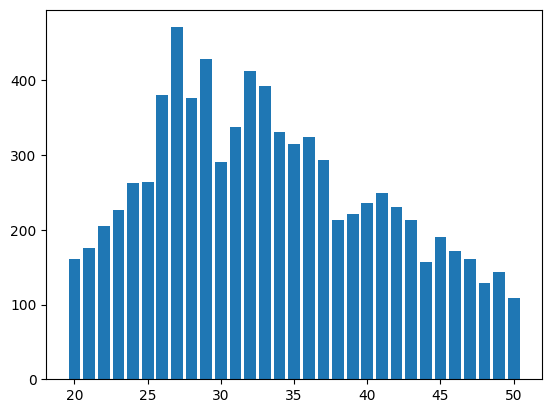

In [134]:
plt.figure()
# 각 x축 데이터 지점에 y축 데이터의 길이의 막대를 그린다.
plt.bar(age_label, num_age) #x축 y축
plt.show()

In [135]:
train_y=[]
for age in label_list:
    if 20 <= age <= 24:
        train_y.append('20-24')
    elif 25 <= age <= 29:
        train_y.append('25-29')
    elif 30 <= age <= 34:
        train_y.append('30-34')
    elif 35 <= age <= 39:
        train_y.append('35-39')
    elif 40 <= age <= 44:
        train_y.append('40-44')
    elif 45 <= age <= 50:
        train_y.append('45-50')
print(len(train_y))

8072


In [136]:
len(train_path)

8072

In [137]:
# train_path와 train_y를 사용하여 데이터 프레임 생성
df = pd.DataFrame({'FilePath': train_path, 'Age': train_y})

print(df.head())

                                            FilePath    Age
0  ../input/ererer/All-Age-Faces Dataset/original...  20-24
1  ../input/ererer/All-Age-Faces Dataset/original...  20-24
2  ../input/ererer/All-Age-Faces Dataset/original...  20-24
3  ../input/ererer/All-Age-Faces Dataset/original...  20-24
4  ../input/ererer/All-Age-Faces Dataset/original...  20-24


In [138]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# train 데이터프레임의 'Age' 열을 라벨 인코딩
df['Age_encoded'] = label_encoder.fit_transform(df['Age'])
df

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


,FilePath,Age,Age_encoded
0,../input/ererer/All-Age-Faces Dataset/original...,20-24,0
1,../input/ererer/All-Age-Faces Dataset/original...,20-24,0
2,../input/ererer/All-Age-Faces Dataset/original...,20-24,0
3,../input/ererer/All-Age-Faces Dataset/original...,20-24,0
4,../input/ererer/All-Age-Faces Dataset/original...,20-24,0
...,...,...,...
8067,../input/ererer/All-Age-Faces Dataset/original...,45-50,5
8068,../input/ererer/All-Age-Faces Dataset/original...,45-50,5
8069,../input/ererer/All-Age-Faces Dataset/original...,45-50,5
8070,../input/ererer/All-Age-Faces Dataset/original...,45-50,5


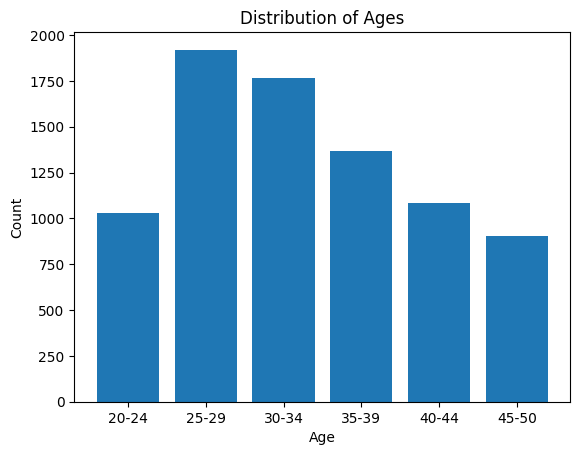

In [139]:
age_counts = df['Age'].value_counts().sort_index()

# 막대그래프로 시각화
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages')
plt.show()

Age: 20-24


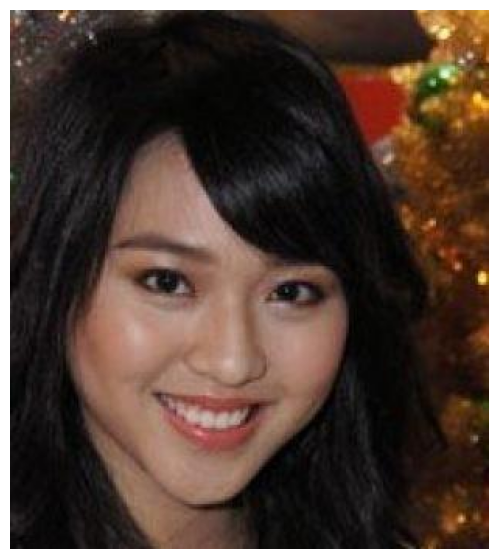

In [140]:
def visualize(image):
    plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.imshow(image)

#choose an image id to see its age
image_id = 30
image_example_path = df.iloc[image_id].FilePath
age = df.iloc[image_id].Age

print(f'Age: {age}')
image = cv2.imread(image_example_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

In [141]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 1)
train_df, valid_df = train_test_split(train_df, test_size = 0.2, random_state = 1)

In [142]:
print(len(train_df))
print(len(test_df))
print(len(valid_df))

5165
1615
1292


In [143]:
def make_weights(labels, nclasses):
    labels = np.array(labels) 
    weight_arr = np.zeros_like(labels) 
    
    _, counts = np.unique(labels, return_counts=True) 
    for cls in range(nclasses):
        weight_arr = np.where(labels == cls, 1/counts[cls], weight_arr) 
        # 각 클래스의의 인덱스를 산출하여 해당 클래스 개수의 역수를 확률로 할당한다.
        # 이를 통해 각 클래스의 전체 가중치를 동일하게 한다.
 
    return weight_arr

In [144]:
weights = make_weights(train_df['Age_encoded'], 4)
weights = torch.DoubleTensor(weights)
print(weights)
print(weights.shape)
weights1 = make_weights(valid_df['Age_encoded'], 4)
weights1 = torch.DoubleTensor(weights1)
print(weights1)
print(weights1.shape)

tensor([0.0000, 0.0008, 0.0000,  ..., 0.0009, 0.0009, 0.0008],
       dtype=torch.float64)
torch.Size([5165])
tensor([0.0000, 0.0032, 0.0000,  ..., 0.0032, 0.0047, 0.0047],
       dtype=torch.float64)
torch.Size([1292])


In [145]:
sampler = torch.utils.data.sampler.WeightedRandomSampler(weights, len(weights))
sampler1 = torch.utils.data.sampler.WeightedRandomSampler(weights1, len(weights1))

In [146]:
from torch.utils.data import Dataset, DataLoader

class ageDataset(Dataset): 
    def __init__(self, dataframe, train=True, transform=None): 
        self.transform = transform 
        self.img_list = dataframe.FilePath.values
        self.label_list= dataframe.Age_encoded.values
        
    def __len__(self): 
        return len(self.img_list) 
    
    def __getitem__(self, idx): 
        image = cv2.imread(self.img_list[idx])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        if self.transform is not None: 
            image = self.transform(image) 
        image = torch.tensor(image , dtype = torch.float)
        label = torch.tensor(self.label_list[idx] , dtype=torch.long)
        return image, label 


In [147]:
original_dataset = ageDataset(dataframe = train_df, train=True, transform=train_transform) #original dataset 구축
horizontal_dataset = ageDataset(dataframe = train_df, train=True, transform=horizontal_transform) #horizonal dataset 구축
zoom_dataset = ageDataset(dataframe = train_df, train=True, transform=zoom_transform)
crop_dataset = ageDataset(dataframe = train_df, train=True, transform=crop_transform)
train_dataset = original_dataset + horizontal_dataset + zoom_dataset + crop_dataset 

train_loader = DataLoader(train_dataset, batch_size = CFG['BATCH_SIZE'], num_workers=2,sampler=sampler) #dataloadet 대입



valid_dataset= ageDataset(dataframe = valid_df, train=False, transform=test_transform)  #validation custom dataset 구축
valid_loader = DataLoader(valid_dataset, batch_size = CFG['BATCH_SIZE'], num_workers=2,sampler=sampler1) #dataloadet 대입

In [148]:
print(len(original_dataset))
print(len(horizontal_dataset))
print(len(zoom_dataset))
print(len(crop_dataset))
print(len(train_dataset))

5165
5165
5165
5165
20660


# Model

In [149]:
from torchvision import models

model1= models.resnet50(models.ResNet50_Weights)
print(model1)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [150]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu') #GPU 할당
print(device)

cuda


In [151]:
model1.fc = nn.Sequential(
    nn.Linear(2048,1024),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(1024,6),
    nn.Softmax()
)
model1=model1.to(device)

In [152]:
import torch.optim as optim
criterion = torch.nn.CrossEntropyLoss() 
optimizer= optim.Adam(model1.parameters(),lr=1e-4,weight_decay=1e-4) 
scheduler = None

In [153]:
import os
from tqdm.notebook import tqdm 
def train(model, optimizer, train_loader,valid_loader, scheduler, device):  #학습 함수정의
    model.to(device) #모델에 디바이스 할당
    n = len(train_loader) #데이터 갯수 파악악
    
    #Loss Function 정의
    #criterion = nn.CrossEntropyLoss().to(device)
    best_acc = 0
    vali_acc=0
    best_apoch=0   
    val_loss=[]
    tr_loss=[]
    for epoch in range(1,CFG["EPOCHS"]+1): #에포크 설정
        model.train() #모델 학습
        running_loss = 0.0
            
        for img, label in tqdm(iter(train_loader)):
            img, label = img.to(device), label.to(device) #배치 데이터
            optimizer.zero_grad() #배치마다 optimizer 초기화
        
            # Data -> Model -> Output
            logit = model(img) #예측값 산출
            loss = criterion(logit, label) #손실함수 계산
            
            # 역전파
            loss.backward() #손실함수 기준 역전파 
            optimizer.step() #가중치 최적화
            running_loss += loss.item()
            train_loss=running_loss / len(train_loader)  
        print('[%d] Train loss: %.10f' %(epoch, running_loss / len(train_loader)))
        tr_loss.append(running_loss / len(train_loader))
        if scheduler is not None:
          scheduler.step()
        #Validation set 평가
        model.eval() #evaluation 과정에서 사용하지 않아야 하는 layer들을 알아서 off 시키도록 하는 함수
        vali_loss = 0.0
        correct = 0
        with torch.no_grad(): #파라미터 업데이트 안하기 때문에 no_grad 사용
            for img, label in tqdm(iter(valid_loader)):
                img, label = img.to(device), label.to(device)

                logit = model(img)
                vali_loss += criterion(logit, label)
                pred = logit.argmax(dim=1, keepdim=True)  #4개의 class중 가장 값이 높은 것을 예측 label로 추출
                correct += pred.eq(label.view_as(pred)).sum().item() #예측값과 실제값이 맞으면 1 아니면 0으로 합산
        vali_acc = 100 * correct / len(valid_loader.dataset)
        print('Vail set: Loss: {:.4f}, Accuracy: {}/{} ( {:.1f}%)\n'.format(vali_loss / len(valid_loader), correct, len(valid_loader.dataset), 100 * correct / len(valid_loader.dataset)))
        val_loss.append(vali_loss / len(valid_loader))
        if best_acc < vali_acc: #early stopping기법 validation의 정확도가 최고치 갱신시 모델 저장장
            best_acc = vali_acc
            best_epoch=epoch
            torch.save(model.state_dict(), './best_model.pth') #이 디렉토리에 best_model.pth을 저장
            print('Model Saved.')
    
        
    return best_acc,tr_loss,val_loss

In [154]:
best_acc,tr_loss,val_loss=train(model1, optimizer, train_loader,valid_loader, scheduler, device)

  0%|          | 0/323 [00:00<?, ?it/s]

[1] Train loss: 1.6289362704


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7128, Accuracy: 388/1292 ( 30.0%)

Model Saved.


  0%|          | 0/323 [00:00<?, ?it/s]

[2] Train loss: 1.5751050928


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6942, Accuracy: 426/1292 ( 33.0%)

Model Saved.


  0%|          | 0/323 [00:00<?, ?it/s]

[3] Train loss: 1.5536679125


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6982, Accuracy: 438/1292 ( 33.9%)

Model Saved.


  0%|          | 0/323 [00:00<?, ?it/s]

[4] Train loss: 1.5094169548


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7174, Accuracy: 396/1292 ( 30.7%)



  0%|          | 0/323 [00:00<?, ?it/s]

[5] Train loss: 1.4885960847


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6998, Accuracy: 428/1292 ( 33.1%)



  0%|          | 0/323 [00:00<?, ?it/s]

[6] Train loss: 1.4662219076


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7423, Accuracy: 372/1292 ( 28.8%)



  0%|          | 0/323 [00:00<?, ?it/s]

[7] Train loss: 1.4235579676


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7186, Accuracy: 407/1292 ( 31.5%)



  0%|          | 0/323 [00:00<?, ?it/s]

[8] Train loss: 1.4322308748


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7501, Accuracy: 355/1292 ( 27.5%)



  0%|          | 0/323 [00:00<?, ?it/s]

[9] Train loss: 1.4047866971


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7165, Accuracy: 406/1292 ( 31.4%)



  0%|          | 0/323 [00:00<?, ?it/s]

[10] Train loss: 1.3881462370


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6699, Accuracy: 475/1292 ( 36.8%)

Model Saved.


  0%|          | 0/323 [00:00<?, ?it/s]

[11] Train loss: 1.3765813068


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7234, Accuracy: 394/1292 ( 30.5%)



  0%|          | 0/323 [00:00<?, ?it/s]

[12] Train loss: 1.3634585489


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7102, Accuracy: 413/1292 ( 32.0%)



  0%|          | 0/323 [00:00<?, ?it/s]

[13] Train loss: 1.3620360433


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6899, Accuracy: 441/1292 ( 34.1%)



  0%|          | 0/323 [00:00<?, ?it/s]

[14] Train loss: 1.3327855112


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7121, Accuracy: 415/1292 ( 32.1%)



  0%|          | 0/323 [00:00<?, ?it/s]

[15] Train loss: 1.3151937037


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7141, Accuracy: 412/1292 ( 31.9%)



  0%|          | 0/323 [00:00<?, ?it/s]

[16] Train loss: 1.3196433565


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7267, Accuracy: 391/1292 ( 30.3%)



  0%|          | 0/323 [00:00<?, ?it/s]

[17] Train loss: 1.2855868166


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7017, Accuracy: 427/1292 ( 33.0%)



  0%|          | 0/323 [00:00<?, ?it/s]

[18] Train loss: 1.2894035039


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7220, Accuracy: 404/1292 ( 31.3%)



  0%|          | 0/323 [00:00<?, ?it/s]

[19] Train loss: 1.2828653032


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7259, Accuracy: 397/1292 ( 30.7%)



  0%|          | 0/323 [00:00<?, ?it/s]

[20] Train loss: 1.2769462789


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6688, Accuracy: 475/1292 ( 36.8%)



  0%|          | 0/323 [00:00<?, ?it/s]

[21] Train loss: 1.2440630692


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7145, Accuracy: 412/1292 ( 31.9%)



  0%|          | 0/323 [00:00<?, ?it/s]

[22] Train loss: 1.2393558933


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6882, Accuracy: 438/1292 ( 33.9%)



  0%|          | 0/323 [00:00<?, ?it/s]

[23] Train loss: 1.2271617824


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6955, Accuracy: 445/1292 ( 34.4%)



  0%|          | 0/323 [00:00<?, ?it/s]

[24] Train loss: 1.2152061027


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6980, Accuracy: 433/1292 ( 33.5%)



  0%|          | 0/323 [00:00<?, ?it/s]

[25] Train loss: 1.2023603650


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6810, Accuracy: 449/1292 ( 34.8%)



  0%|          | 0/323 [00:00<?, ?it/s]

[26] Train loss: 1.2067523601


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7153, Accuracy: 406/1292 ( 31.4%)



  0%|          | 0/323 [00:00<?, ?it/s]

[27] Train loss: 1.1937401797


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6882, Accuracy: 439/1292 ( 34.0%)



  0%|          | 0/323 [00:00<?, ?it/s]

[28] Train loss: 1.1761254460


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7286, Accuracy: 382/1292 ( 29.6%)



  0%|          | 0/323 [00:00<?, ?it/s]

[29] Train loss: 1.1578266399


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7115, Accuracy: 406/1292 ( 31.4%)



  0%|          | 0/323 [00:00<?, ?it/s]

[30] Train loss: 1.1611180933


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7027, Accuracy: 433/1292 ( 33.5%)



  0%|          | 0/323 [00:00<?, ?it/s]

[31] Train loss: 1.1456242682


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7055, Accuracy: 431/1292 ( 33.4%)



  0%|          | 0/323 [00:00<?, ?it/s]

[32] Train loss: 1.1530089559


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6876, Accuracy: 448/1292 ( 34.7%)



  0%|          | 0/323 [00:00<?, ?it/s]

[33] Train loss: 1.1511262954


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7029, Accuracy: 424/1292 ( 32.8%)



  0%|          | 0/323 [00:00<?, ?it/s]

[34] Train loss: 1.1428010298


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6896, Accuracy: 457/1292 ( 35.4%)



  0%|          | 0/323 [00:00<?, ?it/s]

[35] Train loss: 1.1283289689


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6655, Accuracy: 469/1292 ( 36.3%)



  0%|          | 0/323 [00:00<?, ?it/s]

[36] Train loss: 1.1196818669


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6862, Accuracy: 450/1292 ( 34.8%)



  0%|          | 0/323 [00:00<?, ?it/s]

[37] Train loss: 1.1241392558


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6935, Accuracy: 433/1292 ( 33.5%)



  0%|          | 0/323 [00:00<?, ?it/s]

[38] Train loss: 1.1184930809


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7076, Accuracy: 413/1292 ( 32.0%)



  0%|          | 0/323 [00:00<?, ?it/s]

[39] Train loss: 1.1082089124


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6934, Accuracy: 436/1292 ( 33.7%)



  0%|          | 0/323 [00:00<?, ?it/s]

[40] Train loss: 1.1188501204


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7215, Accuracy: 392/1292 ( 30.3%)



  0%|          | 0/323 [00:00<?, ?it/s]

[41] Train loss: 1.1306141600


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7135, Accuracy: 414/1292 ( 32.0%)



  0%|          | 0/323 [00:00<?, ?it/s]

[42] Train loss: 1.1037544846


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6888, Accuracy: 448/1292 ( 34.7%)



  0%|          | 0/323 [00:00<?, ?it/s]

[43] Train loss: 1.1090797596


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7237, Accuracy: 410/1292 ( 31.7%)



  0%|          | 0/323 [00:00<?, ?it/s]

[44] Train loss: 1.1040050153


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6899, Accuracy: 447/1292 ( 34.6%)



  0%|          | 0/323 [00:00<?, ?it/s]

[45] Train loss: 1.1256739219


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7010, Accuracy: 432/1292 ( 33.4%)



  0%|          | 0/323 [00:00<?, ?it/s]

[46] Train loss: 1.1149370449


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7424, Accuracy: 373/1292 ( 28.9%)



  0%|          | 0/323 [00:00<?, ?it/s]

[47] Train loss: 1.0994627472


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7140, Accuracy: 419/1292 ( 32.4%)



  0%|          | 0/323 [00:00<?, ?it/s]

[48] Train loss: 1.1104031174


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6872, Accuracy: 448/1292 ( 34.7%)



  0%|          | 0/323 [00:00<?, ?it/s]

[49] Train loss: 1.1130607088


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6871, Accuracy: 446/1292 ( 34.5%)



  0%|          | 0/323 [00:00<?, ?it/s]

[50] Train loss: 1.0920686194


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6932, Accuracy: 442/1292 ( 34.2%)



  0%|          | 0/323 [00:00<?, ?it/s]

[51] Train loss: 1.0956316994


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6922, Accuracy: 451/1292 ( 34.9%)



  0%|          | 0/323 [00:00<?, ?it/s]

[52] Train loss: 1.0966229394


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6931, Accuracy: 423/1292 ( 32.7%)



  0%|          | 0/323 [00:00<?, ?it/s]

[53] Train loss: 1.0767395939


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6882, Accuracy: 443/1292 ( 34.3%)



  0%|          | 0/323 [00:00<?, ?it/s]

[54] Train loss: 1.0836224663


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7038, Accuracy: 433/1292 ( 33.5%)



  0%|          | 0/323 [00:00<?, ?it/s]

[55] Train loss: 1.0867672358


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7048, Accuracy: 439/1292 ( 34.0%)



  0%|          | 0/323 [00:00<?, ?it/s]

[56] Train loss: 1.0839641094


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6853, Accuracy: 448/1292 ( 34.7%)



  0%|          | 0/323 [00:00<?, ?it/s]

[57] Train loss: 1.0818650309


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6713, Accuracy: 469/1292 ( 36.3%)



  0%|          | 0/323 [00:00<?, ?it/s]

[58] Train loss: 1.0810940686


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7076, Accuracy: 420/1292 ( 32.5%)



  0%|          | 0/323 [00:00<?, ?it/s]

[59] Train loss: 1.1029134461


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7153, Accuracy: 411/1292 ( 31.8%)



  0%|          | 0/323 [00:00<?, ?it/s]

[60] Train loss: 1.1061817681


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7231, Accuracy: 402/1292 ( 31.1%)



  0%|          | 0/323 [00:00<?, ?it/s]

[61] Train loss: 1.1001864904


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7111, Accuracy: 417/1292 ( 32.3%)



  0%|          | 0/323 [00:00<?, ?it/s]

[62] Train loss: 1.0898502106


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6954, Accuracy: 430/1292 ( 33.3%)



  0%|          | 0/323 [00:00<?, ?it/s]

[63] Train loss: 1.0815624899


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6759, Accuracy: 455/1292 ( 35.2%)



  0%|          | 0/323 [00:00<?, ?it/s]

[64] Train loss: 1.0764274103


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6934, Accuracy: 428/1292 ( 33.1%)



  0%|          | 0/323 [00:00<?, ?it/s]

[65] Train loss: 1.0854466814


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6638, Accuracy: 475/1292 ( 36.8%)



  0%|          | 0/323 [00:00<?, ?it/s]

[66] Train loss: 1.0816149055


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6982, Accuracy: 423/1292 ( 32.7%)



  0%|          | 0/323 [00:00<?, ?it/s]

[67] Train loss: 1.0750521196


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6925, Accuracy: 441/1292 ( 34.1%)



  0%|          | 0/323 [00:00<?, ?it/s]

[68] Train loss: 1.0789361878


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6979, Accuracy: 434/1292 ( 33.6%)



  0%|          | 0/323 [00:00<?, ?it/s]

[69] Train loss: 1.0701536926


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7225, Accuracy: 408/1292 ( 31.6%)



  0%|          | 0/323 [00:00<?, ?it/s]

[70] Train loss: 1.0787637042


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6838, Accuracy: 442/1292 ( 34.2%)



  0%|          | 0/323 [00:00<?, ?it/s]

[71] Train loss: 1.0776843973


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7046, Accuracy: 420/1292 ( 32.5%)



  0%|          | 0/323 [00:00<?, ?it/s]

[72] Train loss: 1.0777649865


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7203, Accuracy: 406/1292 ( 31.4%)



  0%|          | 0/323 [00:00<?, ?it/s]

[73] Train loss: 1.0860098117


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7200, Accuracy: 397/1292 ( 30.7%)



  0%|          | 0/323 [00:00<?, ?it/s]

[74] Train loss: 1.0756644715


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6937, Accuracy: 432/1292 ( 33.4%)



  0%|          | 0/323 [00:00<?, ?it/s]

[75] Train loss: 1.0799656822


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6984, Accuracy: 425/1292 ( 32.9%)



  0%|          | 0/323 [00:00<?, ?it/s]

[76] Train loss: 1.0792123666


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6976, Accuracy: 435/1292 ( 33.7%)



  0%|          | 0/323 [00:00<?, ?it/s]

[77] Train loss: 1.0742230116


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6744, Accuracy: 469/1292 ( 36.3%)



  0%|          | 0/323 [00:00<?, ?it/s]

[78] Train loss: 1.0787542055


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7252, Accuracy: 385/1292 ( 29.8%)



  0%|          | 0/323 [00:00<?, ?it/s]

[79] Train loss: 1.0758849246


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6997, Accuracy: 434/1292 ( 33.6%)



  0%|          | 0/323 [00:00<?, ?it/s]

[80] Train loss: 1.0729395956


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7456, Accuracy: 361/1292 ( 27.9%)



  0%|          | 0/323 [00:00<?, ?it/s]

[81] Train loss: 1.0830199198


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7200, Accuracy: 405/1292 ( 31.3%)



  0%|          | 0/323 [00:00<?, ?it/s]

[82] Train loss: 1.0712581637


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7093, Accuracy: 430/1292 ( 33.3%)



  0%|          | 0/323 [00:00<?, ?it/s]

[83] Train loss: 1.0774043688


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7325, Accuracy: 391/1292 ( 30.3%)



  0%|          | 0/323 [00:00<?, ?it/s]

[84] Train loss: 1.0801252444


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7380, Accuracy: 380/1292 ( 29.4%)



  0%|          | 0/323 [00:00<?, ?it/s]

[85] Train loss: 1.0726582262


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7002, Accuracy: 424/1292 ( 32.8%)



  0%|          | 0/323 [00:00<?, ?it/s]

[86] Train loss: 1.0708509248


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6831, Accuracy: 453/1292 ( 35.1%)



  0%|          | 0/323 [00:00<?, ?it/s]

[87] Train loss: 1.0686050329


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7033, Accuracy: 431/1292 ( 33.4%)



  0%|          | 0/323 [00:00<?, ?it/s]

[88] Train loss: 1.0697570305


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6880, Accuracy: 443/1292 ( 34.3%)



  0%|          | 0/323 [00:00<?, ?it/s]

[89] Train loss: 1.0669747916


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6988, Accuracy: 432/1292 ( 33.4%)



  0%|          | 0/323 [00:00<?, ?it/s]

[90] Train loss: 1.0727798869


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6921, Accuracy: 436/1292 ( 33.7%)



  0%|          | 0/323 [00:00<?, ?it/s]

[91] Train loss: 1.0685766039


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6924, Accuracy: 429/1292 ( 33.2%)



  0%|          | 0/323 [00:00<?, ?it/s]

[92] Train loss: 1.0680137397


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7291, Accuracy: 384/1292 ( 29.7%)



  0%|          | 0/323 [00:00<?, ?it/s]

[93] Train loss: 1.0799663764


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6835, Accuracy: 441/1292 ( 34.1%)



  0%|          | 0/323 [00:00<?, ?it/s]

[94] Train loss: 1.0792453429


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6951, Accuracy: 433/1292 ( 33.5%)



  0%|          | 0/323 [00:00<?, ?it/s]

[95] Train loss: 1.0678276211


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7015, Accuracy: 411/1292 ( 31.8%)



  0%|          | 0/323 [00:00<?, ?it/s]

[96] Train loss: 1.0687762646


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7258, Accuracy: 396/1292 ( 30.7%)



  0%|          | 0/323 [00:00<?, ?it/s]

[97] Train loss: 1.0706385138


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6904, Accuracy: 428/1292 ( 33.1%)



  0%|          | 0/323 [00:00<?, ?it/s]

[98] Train loss: 1.0621009954


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.6824, Accuracy: 460/1292 ( 35.6%)



  0%|          | 0/323 [00:00<?, ?it/s]

[99] Train loss: 1.0663939914


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7182, Accuracy: 412/1292 ( 31.9%)



  0%|          | 0/323 [00:00<?, ?it/s]

[100] Train loss: 1.0705727911


  0%|          | 0/81 [00:00<?, ?it/s]

Vail set: Loss: 1.7236, Accuracy: 408/1292 ( 31.6%)



In [155]:
valid_loss = []
for i in range(len(val_loss)):
  valid_loss.append(val_loss[i].tolist())
print("best_accuracy : ",best_acc)

best_accuracy :  36.76470588235294


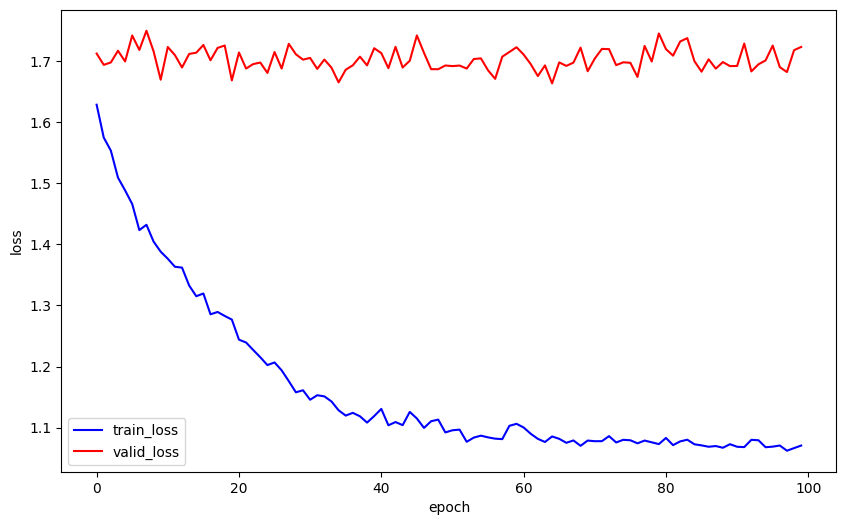

In [156]:
plt.figure(1,figsize=(10,6)) #plt 사이즈 설정
plt.xlabel('epoch') 
plt.ylabel('loss')
plt.plot(tr_loss[:],c='b',label='train_loss') 
plt.plot(valid_loss[:],c='r',label='valid_loss')
plt.legend(loc='best')

In [157]:
from torchvision import transforms
ws_df = pd.DataFrame({'FilePath':['/kaggle/input/wonseok2/leewonseok.jpg', '/kaggle/input/lee1seok/leewonseok2.jpg', '/kaggle/input/lee1seok/leewonseok3.jpg'],
                             'Age_encoded':[0, 0, 0]})
# CustomDataset 인스턴스 생성
my_dataset = ageDataset(dataframe = ws_df, train=False, transform=test_transform)
my_loader = DataLoader(my_dataset, batch_size = CFG['BATCH_SIZE'], num_workers=2)

In [158]:
check_point=torch.load('/kaggle/working/best_model.pth')
model=model1
model=model.to(device)
model.load_state_dict(check_point)

<All keys matched successfully>

In [159]:
with torch.no_grad(): #파라미터 업데이트 안하기 때문에 no_grad 사용
    for img, label in tqdm(iter(my_loader)):
        img, label = img.to(device), label.to(device)

        logit = model(img)
        pred = logit.argmax(dim=1, keepdim=True)
        print(logit)
        print(pred)

  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[1.5154e-06, 9.8984e-05, 2.2453e-05, 9.9988e-01, 1.0783e-09, 1.5375e-09],
        [1.7178e-06, 1.3296e-05, 4.1759e-06, 9.9998e-01, 5.7799e-10, 9.3827e-10],
        [1.4728e-04, 9.6376e-01, 2.7290e-04, 3.5819e-02, 1.7850e-07, 1.9315e-07]],
       device='cuda:0')
tensor([[3],
        [3],
        [1]], device='cuda:0')


In [160]:
pred=pred.tolist()
logit=logit.tolist()
print(logit[0])
print()
print(logit[1])
print()
print(logit[2])
print()
print(pred)

[1.5153819958868553e-06, 9.898353164317086e-05, 2.245302493975032e-05, 0.9998770952224731, 1.078315103875127e-09, 1.5374784778643402e-09]

[1.7178122106997762e-06, 1.3295997632667422e-05, 4.1759108171390835e-06, 0.9999808073043823, 5.779917100490195e-10, 9.382697951920704e-10]

[0.0001472846051910892, 0.963760256767273, 0.00027290251455269754, 0.03581906110048294, 1.7850226186055806e-07, 1.9315426413868408e-07]

[[3], [3], [1]]


In [161]:
for i in range(len(pred)):
    print(pred[i][0])

3
3
1


In [162]:
age_labels = {'20-24' : 0, '25-29' : 1, '30-34' : 2, '35-39' : 3, '40-44' : 4, '45-50': 5}
inverse_age_labels = {v: k for k, v in age_labels.items()}

In [163]:
def visualize_prediction(image, true_age, predicted_age):
    plt.imshow(image)
    plt.title(f'True Age: {true_age} | Predicted Age: {predicted_age}')
    plt.axis('off')
    plt.show()


1 번째 사진 1.00확률로 35-39살



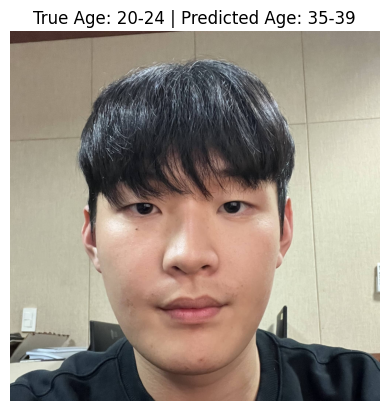

2 번째 사진 1.00확률로 35-39살



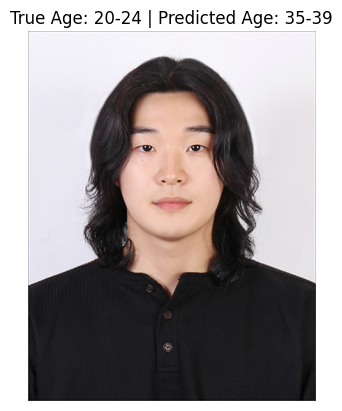

3 번째 사진 0.96확률로 25-29살



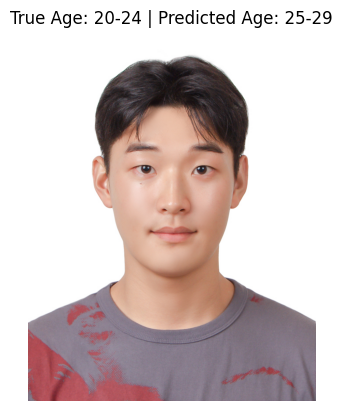

In [169]:
for i in range(len(pred)):
    true_age = my_dataset[i][1].item()
    true_age = inverse_age_labels.get(true_age, None)
    
    predicted_age = inverse_age_labels.get(pred[i][0])
    print(i+1, "번째 사진 {:.2f}확률로 {}살\n".format(max(logit[i]), predicted_age))
    
    image = cv2.imread(ws_df.FilePath[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    visualize_prediction(image, true_age, predicted_age)